In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('p3.csv',delim_whitespace=True)
df2 = pd.read_csv('p1.csv',delim_whitespace=True)
df3 = pd.read_csv('p2.csv',delim_whitespace=True)

In [3]:
def plot_pareto_frontier(Xs, Ys, maxX=True, maxY=True):
    '''Pareto frontier selection process'''
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxY)
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)
    
    '''Plotting process'''
    plt.scatter(Xs,Ys, color = 'b')
    pf_X = [pair[0] for pair in pareto_front]
    pf_Y = [pair[1] for pair in pareto_front]
    plt.scatter(pf_X, pf_Y, color = 'r')
    plt.plot(pf_X, pf_Y, color = 'r', label = 'Pareto Front')



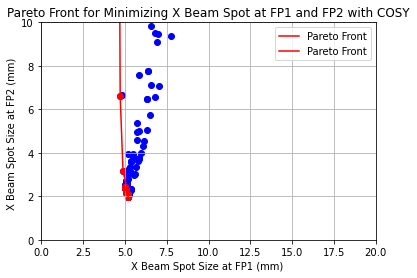

In [4]:
plot_pareto_frontier(df['col1']*1000,df['col2']*1000,maxX=False,maxY=False)
plt.title('Pareto Front for Minimizing X Beam Spot at FP1 and FP2 with COSY')
#plt.scatter(df['col1'][0]*1000,df['col2'][0]*1000, label = 'Initial Soultion')

plot_pareto_frontier(df2['col1']*1000,df2['col2']*1000,maxX=False,maxY=False)
# plt.scatter(df2['col1'][0]*1000,df2['col2'][0]*1000, label = 'Initial Soultion')

plt.xlabel('X Beam Spot Size at FP1 (mm) ')
plt.ylabel('X Beam Spot Size at FP2 (mm) ')
plt.grid()
plt.xlim(0,20)
plt.ylim(0,10)
plt.legend()

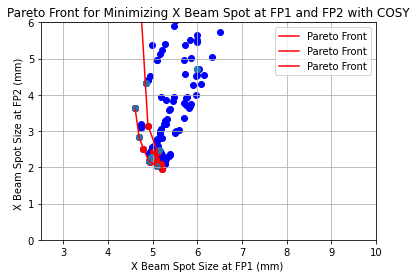

In [5]:
plot_pareto_frontier(df3['col1']*1000,df3['col2']*1000,maxX=False,maxY=False)
plot_pareto_frontier(df2['col1']*1000,df2['col2']*1000,maxX=False,maxY=False)
plot_pareto_frontier(df['col1']*1000,df['col2']*1000,maxX=False,maxY=False)

plt.title('Pareto Front for Minimizing X Beam Spot at FP1 and FP2 with COSY')

plt.scatter(df3['col1'].iloc[90:]*1000, df3['col2'].iloc[90:]*1000)
plt.xlabel('X Beam Spot Size at FP1 (mm) ')
plt.ylabel('X Beam Spot Size at FP2 (mm) ')
plt.grid()
plt.xlim(2.5,10)
plt.ylim(0,6)
plt.legend()

In [6]:
fp1 = list(df['col1']) + list(df2['col1']) +list(df3['col1'])
fp2 = list(df['col2']) + list(df2['col2']) +list(df3['col2'])
fp1 = np.array(fp1)
fp2 = np.array(fp2)

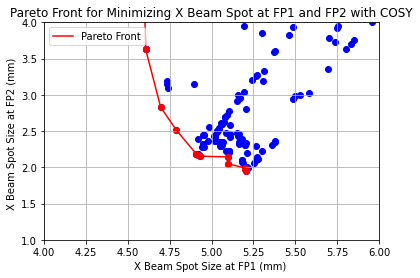

In [7]:
plot_pareto_frontier(fp1*1000,fp2*1000,maxX=False,maxY=False)


plt.title('Pareto Front for Minimizing X Beam Spot at FP1 and FP2 with COSY')

plt.xlabel('X Beam Spot Size at FP1 (mm) ')
plt.ylabel('X Beam Spot Size at FP2 (mm) ')
plt.grid()
plt.xlim(4,6)
plt.ylim(1,4)
plt.legend()

In [8]:
df4 = pd.read_csv('p4.csv',delim_whitespace=True)

(0.0, 10.0)

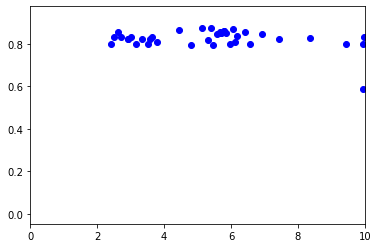

In [9]:
plot_pareto_frontier(df4['col1']*1000,df4['col2'],maxX=False,maxY=True)
plt.xlim(0,10)


(1.0, 5.0)

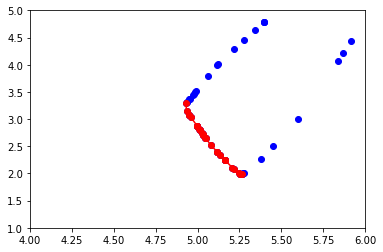

In [15]:
df5 = pd.read_csv('p5.csv',delim_whitespace=True)
plot_pareto_frontier(df5['col1']*1000,df5['col2']*1000,maxX=False,maxY=False)
plt.xlim(4,6)
plt.ylim(1,5)

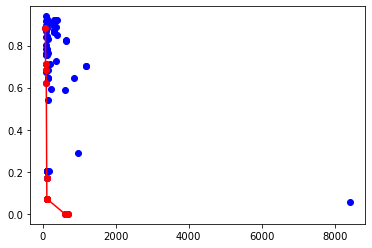

In [16]:
df6 = pd.read_csv('p6.csv',delim_whitespace=True)
plot_pareto_frontier(df6['col1']*1000,df6['col2'],maxX=False,maxY=False)